How to use splotch to plot one image per condition

beta_level_1 used in post-processing of splotch output
 /ahg/regevdata/projects/ST_SpatialTranscriptomics/splotch/scripts/assist/read_splotch_newOuputFolder.py used on cluster
 splotch_two_levels
 12 warmup samples
 same order of columns in count file and annotation file, used in splotch
 called /outputs/ST_43/splotch/output_v4 on the server

In [1]:
from __future__ import absolute_import, division, print_function

import os
import re
import glob
import numpy
import matplotlib
import matplotlib.pyplot as plt
import pickle
import pandas as pd

import seaborn as sns



%matplotlib inline

matplotlib.rcParams.update({'axes.linewidth': 0.25,
                            'xtick.major.size': 2,
                            'xtick.major.width': 0.25,
                            'ytick.major.size': 2,
                            'ytick.major.width': 0.25,
                            'pdf.fonttype': 42,
                            'font.sans-serif': 'Arial'})

In [2]:
def read_array_metadata(metadata,filename,n_levels, extraplot=None):
    array_metadata = metadata[metadata['Count file'] == filename]
    array_levels = [array_metadata['Level %d'%(idx+1)].values[0] for idx in range(0,n_levels)]
    
    if extraplot != None:
        array_levels = array_metadata['Extra_plot_level'].tolist()
    return array_levels

In [140]:
# Load Lambda pmean df

#path = '/Users/svickovi/Desktop/tags/ms_200ul_1mm_2dist'
# path = '/Users/svickovi/Desktop/tags/ms_50ul_1mm_1dist/STB59_500_500/'
path = '/Users/svickovi/Desktop/tags/ms_50ul_1mm_1dist/STB57/'
# # Read file
#filename = os.path.join(path, 'lambdas_pmeans_spleen_exons_tags_6tags.tsv')

# Read file
#filename = os.path.join(path, 'lambdas_pmeans_spleen_exons_tags_2tags.tsv')
#filename = os.path.join(path, 'lambdas_pmeans_spleen_exons_tags_ifs.tsv')
filename = os.path.join(path, 'lambdas_pmeans.tsv')

lambda_posterior_means = pd.read_csv(filename, index_col=0, sep='\t', header=[0,1])

print(lambda_posterior_means.head())

file                 /ahg/regevdata/projects/splotch_spatial_transcriptomics/outputs/splotch/tags/spleen_aug/output/Count_Tables/10015CN77_D1_stdata_adjusted.tsv  \
coordinate                                                                                                                                                  28_21   
F480-TTAACTTCAGCCCGT                                           5.035697                                                                                             
IgD-TCATATCCGTTGTCC                                            4.916659                                                                                             

file                                                                    \
coordinate                9_28     28_30      3_24     29_24     26_21   
F480-TTAACTTCAGCCCGT  5.005996  5.027078  4.977123  5.022123  5.027302   
IgD-TCATATCCGTTGTCC   4.941402  4.923300  4.975336  4.928803  4.922441   

file                                      

In [143]:
# Load sample_information file
# Read file
#info_file = os.path.join(path, 'information_spleen_exons_tags_6tags.p')
#info_file = os.path.join(path, 'information_spleen_exons_tags_ifs.p')
info_file = os.path.join(path, 'information.p')
info = pickle.load(open(info_file,'rb')) 
    
metadata = info['metadata']
n_levels = info['n_levels']

print(metadata)
print(n_levels)

           Name Level 1                                         Count file  \
0  10015CN77_C1  Spleen  /ahg/regevdata/projects/splotch_spatial_transc...   
1  10015CN77_D1  Spleen  /ahg/regevdata/projects/splotch_spatial_transc...   
2  10015CN77_E1  Spleen  /ahg/regevdata/projects/splotch_spatial_transc...   

                                     Annotation file Image file  
0  /ahg/regevdata/projects/splotch_spatial_transc...     HE.jpg  
1  /ahg/regevdata/projects/splotch_spatial_transc...     HE.jpg  
2  /ahg/regevdata/projects/splotch_spatial_transc...     HE.jpg  
1


In [144]:
# Take exp()
lambda_posterior_means = lambda_posterior_means.astype(float)
lambda_posterior_means = numpy.exp(lambda_posterior_means-1)

# Plot individually sections

In [145]:
nwe=[]
nm=lambda_posterior_means.index
for item in nm:
    nwe.append(str(item).split("-")[0])
nwe

['F480', 'IgD']

In [146]:
lambda_posterior_means.index = nwe
lambda_posterior_means.index

Index(['F480', 'IgD'], dtype='object')

In [152]:
gene = 'F480'

In [153]:
# get the names of the count files
count_files = numpy.array(list(lambda_posterior_means.columns.levels[0]))



In [154]:
count_files

array(['/ahg/regevdata/projects/splotch_spatial_transcriptomics/outputs/splotch/tags/spleen_aug/output/Count_Tables/10015CN77_C1_stdata_adjusted.tsv',
       '/ahg/regevdata/projects/splotch_spatial_transcriptomics/outputs/splotch/tags/spleen_aug/output/Count_Tables/10015CN77_D1_stdata_adjusted.tsv',
       '/ahg/regevdata/projects/splotch_spatial_transcriptomics/outputs/splotch/tags/spleen_aug/output/Count_Tables/10015CN77_E1_stdata_adjusted.tsv'],
      dtype='<U140')

3


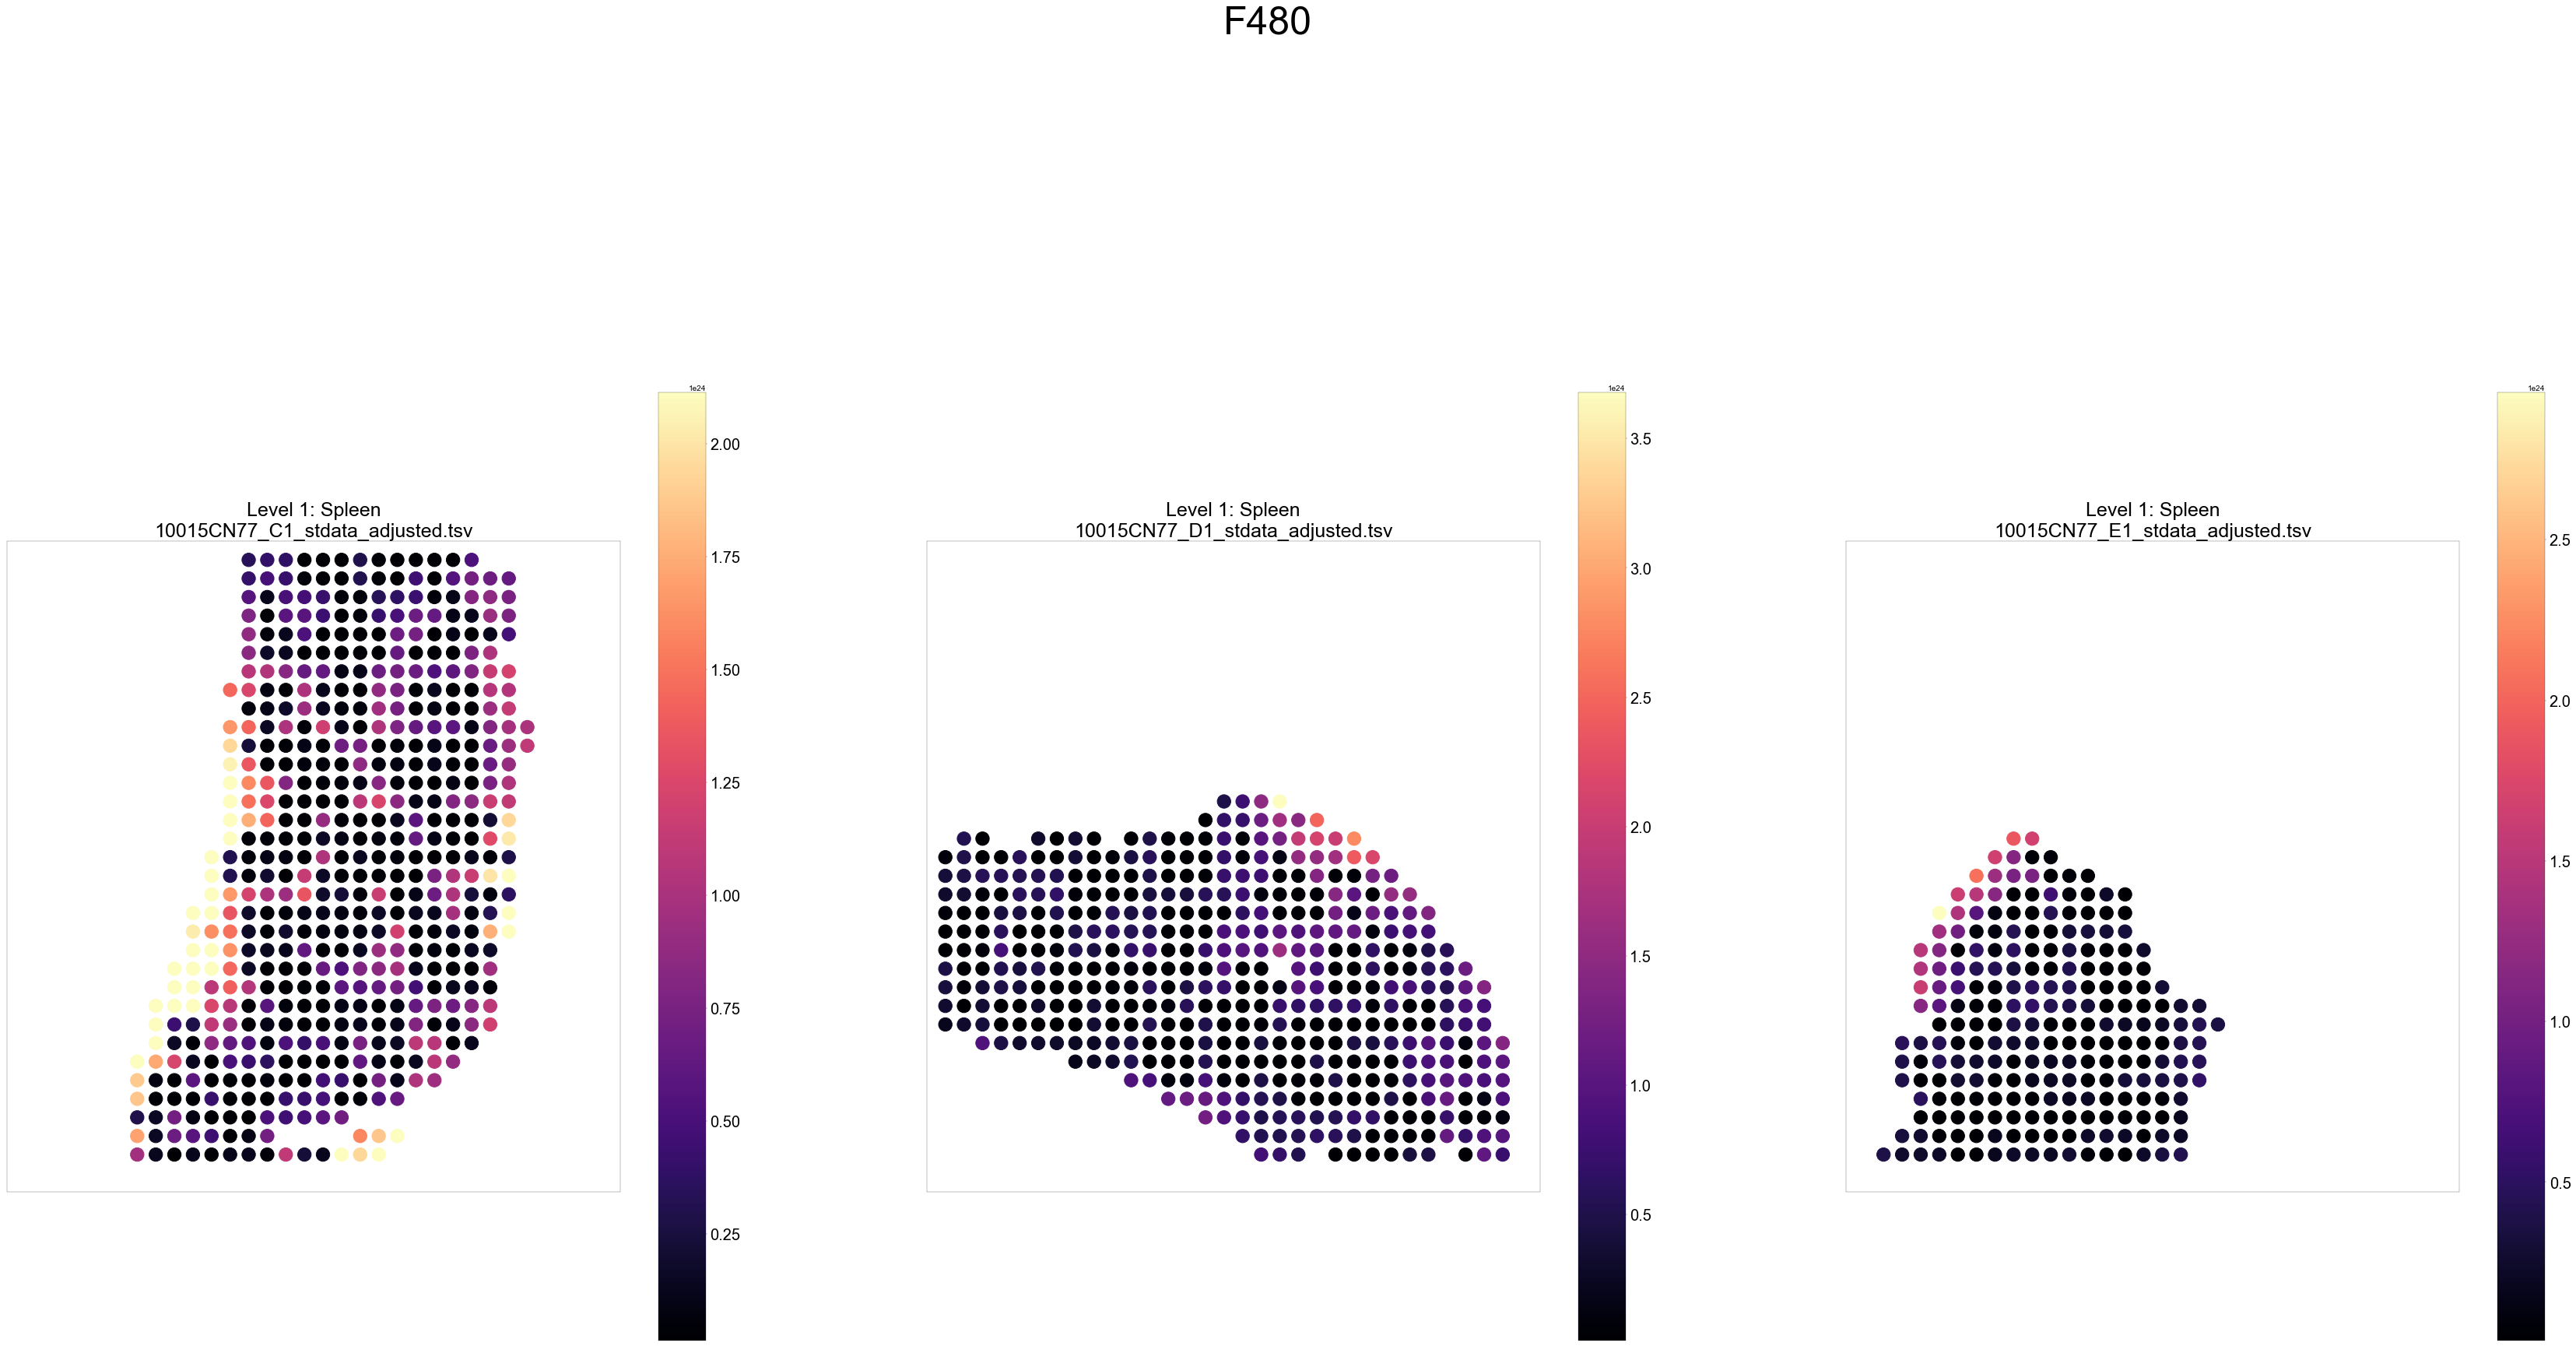

In [157]:
# initialize a figure
fig = matplotlib.pyplot.figure(figsize=(60, 60))

num_cols = 3

axes = []

for i in range(0,int((int(len(count_files)+2)/num_cols))):
    for j in range(0, num_cols):
        ax = plt.subplot2grid((int((len(count_files)+2)/num_cols+1), num_cols), (i, j))
        axes.append(ax) 
print(len(axes))

# use the same color scale across the arrays
# vmin,vmax =5,numpy.percentile(lambda_posterior_means.loc[gene].values,100)

fig.suptitle(gene, fontsize=50)

# igd
# mins = [20,30,20,20]
# maxs = [100,100,99,100]

# f4
mins = [0,0,0,0,0,0]
maxs = [95,100,100,100,100,100]
# loop over the count files
for n, count_file in enumerate(count_files):
    
    ax = axes[n]

    coordinates = numpy.array([list(map(float,coordinate.split('_')))
                               for coordinate in list(lambda_posterior_means[count_file].columns)])
    
    x_coordinates = (coordinates[:,0]-1)
    y_coordinates = (coordinates[:,1]-1)
    
    # visualize the ST spots 
    s=300
    
    vmin = numpy.percentile(lambda_posterior_means[count_file].loc[gene].values,mins[n])
    vmax = numpy.percentile(lambda_posterior_means[count_file].loc[gene].values,maxs[n])
    
    cbmap = ax.scatter(x_coordinates,y_coordinates,
                       s=s,c=lambda_posterior_means[count_file].loc[gene],
                       cmap='magma',vmin=vmin,vmax=vmax,marker='o')
    
    ax.set_aspect('equal')
    
    ax.set_xticks([])
    ax.set_yticks([])
    
    ax.set_xlim(0, 33)
    ax.set_ylim(35,0)
    
    # put some information on the array in the title
    ax.set_title('%s\n%s'%(
        '\n'.join(['Level %d: %s'%(level_idx+1,level)
                   for level_idx,level in enumerate(list(map(str,read_array_metadata(metadata,count_file,n_levels))))]),count_file.split('/')[-1]), fontsize=25)
    
    cbar = matplotlib.pyplot.colorbar(cbmap,ax=ax,shrink=0.8)
    cbar.ax.tick_params(labelsize=20) 
    
    #cbar.set_label(r'%s $\bar{\lambda}$'%(gene), fontsize=25)
    
fig.subplots_adjust(top=0.90)
#fig.savefig(gene+'_tags.pdf')